# Задача: аппроксимация функции

Рассмотрим сложную математическую функцию на отрезке $[1, 15]$:


$$f(x) = \sin{(\frac{x}{5})} * e^{\frac{x}{10}} + 5 * e^{\frac{-x}{2}}$$


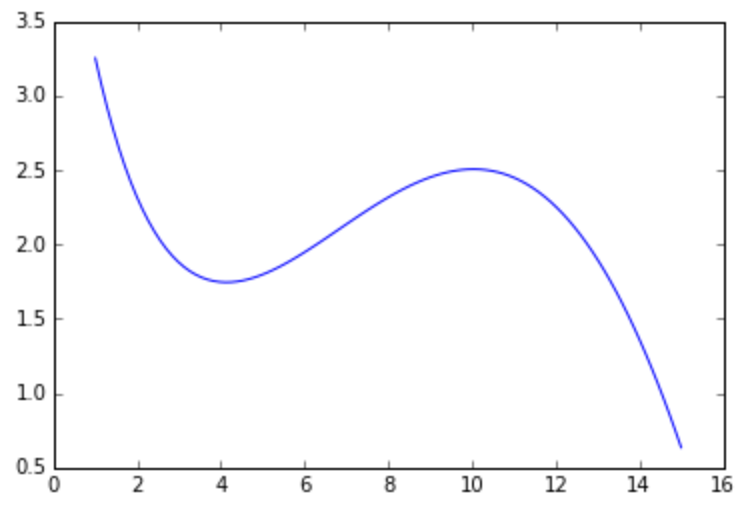

Она может описывать, например, зависимость оценок, которые выставляют определенному сорту вина эксперты, в зависимости от возраста этого вина. По сути, задача машинного обучения состоит в том, чтобы приблизить сложную зависимость с помощью функции из определенного семейства. В этом задании мы будем приближать указанную функцию с помощью многочленов.

Как известно, многочлен степени n (то есть w_0 + w_1 x + w_2 x^2 + ... + w_n x^n) однозначно определяется любыми n + 1 различными точками, через которые он проходит. Это значит, что его коэффициенты w_0, ... w_n можно определить из следующей системы линейных уравнений:

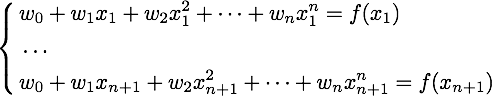

где через x_1, ..., x_n, x_{n+1} обозначены точки, через которые проходит многочлен, а через f(x_1), ..., f(x_n), f(x_{n+1}) — значения, которые он должен принимать в этих точках.

Воспользуемся описанным свойством, и будем находить приближение функции многочленом, решая систему линейных уравнений.

# Solution 

In [1]:
from numpy import sin, exp
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve

In [2]:
# Define f(x).
def f(x):
    return sin(x / 5.)*exp(x/10.) + 5*exp(-x/2.)
x = np.arange(1, 15, 0.1)
y = f(x)

## Approximating with linear function 

In [3]:
# Counting coefficents.
A = np.array([[1, 1],
              [15, 1]])
b = np.array([f(1), f(15)])
b = b.reshape(2,1)
print("A:\n", A)
print("b:\n", b)

A:
 [[ 1  1]
 [15  1]]
b:
 [[3.25221687]
 [0.63522142]]


In [4]:
# Solving system.
solution = solve(A, b)
print("x:\n", solution)

# Check if solution is correct.
print("A*x:\n", np.dot(A, solution))

x:
 [[-0.18692825]
 [ 3.43914511]]
A*x:
 [[3.25221687]
 [0.63522142]]


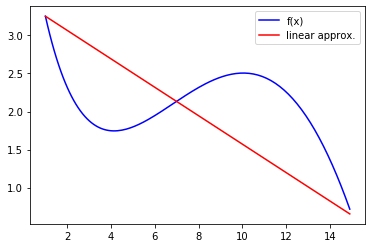

In [5]:
# Building polynomial.
p_1 = np.poly1d(solution.reshape(1,2)[0])

# Calculating values.
y_1 = p_1(x)

# Building plot.
plt.plot(x,y, "b", label="f(x)")
plt.plot(x, y_1, "r", label="linear approx.")
plt.legend()

plt.show()

## Approximating with square function 

In [6]:
# Counting coefficents.
A = np.array([[1, 1, 1], 
              [64, 8, 1], 
              [225, 15, 1]])
b = np.array([f(1), f(8), f(15)])
b = b.reshape(3,1)
print("A:\n", A)
print("b:\n", b)

A:
 [[  1   1   1]
 [ 64   8   1]
 [225  15   1]]
b:
 [[3.25221687]
 [2.31617016]
 [0.63522142]]


In [7]:
# Solving system.
solution = solve(A, b)
print("x:\n", solution)

# Check if solution is correct.
print("A*x:\n", np.dot(A, solution))

x:
 [[-0.00760104]
 [-0.06531159]
 [ 3.32512949]]
A*x:
 [[3.25221687]
 [2.31617016]
 [0.63522142]]


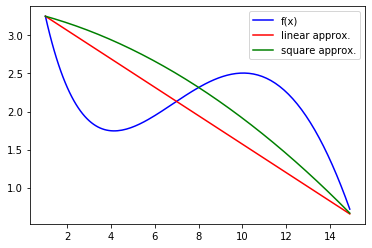

In [8]:
# Building polynomial.
p_2 = np.poly1d(solution.reshape(1,3)[0])

# Calculating values.
y_2 = p_2(x)

# Building plot.
plt.plot(x,y, "b", label="f(x)")
plt.plot(x, y_1, "r", label="linear approx.")
plt.plot(x, y_2, "g", label="square approx.")
plt.legend()

plt.show()

## Approximating with qubic function 

In [9]:
# Counting coefficents.
A = np.array([[1, 1, 1, 1], 
              [64, 16, 4, 1], 
              [1000, 100, 10, 1], 
              [3375, 225, 15, 1]])
b = np.array([f(1), f(4), f(10), f(15)])
b = b.reshape(4,1)
print("A:\n", A)
print("b:\n", b)

A:
 [[   1    1    1    1]
 [  64   16    4    1]
 [1000  100   10    1]
 [3375  225   15    1]]
b:
 [[3.25221687]
 [1.74684595]
 [2.50541641]
 [0.63522142]]


In [10]:
# Solving system.
solution = solve(A, b)
print("x:\n", solution)

# Check if solution is correct.
print("A*x:\n", np.dot(A, solution))

x:
 [[-0.00823565]
 [ 0.19333685]
 [-1.29552587]
 [ 4.36264154]]
A*x:
 [[3.25221687]
 [1.74684595]
 [2.50541641]
 [0.63522142]]


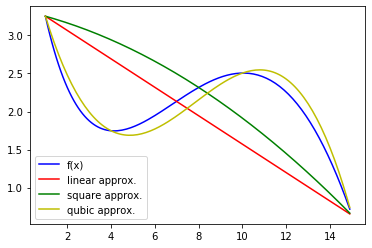

In [11]:
# Building polynomial.
p_3 = np.poly1d(solution.reshape(1,4)[0])

# Calculating values.
y_3 = p_3(x)

# Building plot.
plt.plot(x,y, "b", label="f(x)")
plt.plot(x, y_1, "r", label="linear approx.")
plt.plot(x, y_2, "g", label="square approx.")
plt.plot(x, y_3, "y", label="qubic approx.")
plt.legend()

plt.show()

## Writing output 

In [12]:
solution = np.flip(solution)

In [13]:
# Writing 2 indexes with minimum values to file.
with open('output/submission-2.txt', 'w') as file_obj:
    file_obj.write("{} {} {} {}".format(list(solution[0])[0], 
                                        list(solution[1])[0],
                                        list(solution[2])[0],
                                        list(solution[3])[0],))